In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Replace 'your_html_file.html' with the path to your HTML file
html_file_path = 'Sheet1.html'

# Read HTML tables into a list of DataFrame objects
tables = pd.read_html(html_file_path)

# Assuming the first table is the one you want to convert to CSV
# You may need to iterate through the tables and choose the correct one
df = tables[0]

# Replace 'output_csv_file.csv' with the desired name for your CSV file
csv_file_path = 'E:\Sheet1.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"CSV file '{csv_file_path}' has been created.")

In [22]:
# Importing csv and skipping the first row

data = pd.read_csv('Sheet1.csv',skiprows=2,header=0)


In [24]:
data.head(10)

,2,1.0,user_id,timestamp,event,page_url
0,3,2.0,1,2023-11-23 10:00:00,page_view,https://www.example.com/home
1,4,3.0,1,2023-11-23 10:01:00,click,https://www.example.com/about
2,5,4.0,1,2023-11-23 10:02:00,page_view,https://www.example.com/products
3,6,5.0,1,2023-11-23 10:03:00,click,https://www.example.com/product/1234
4,7,6.0,1,2023-11-23 10:04:00,add_to_cart,https://www.example.com/product/1234
5,8,7.0,2,2023-11-23 10:15:00,page_view,https://www.example.com/contact
6,9,8.0,2,2023-11-23 10:16:00,click,https://www.example.com/contact/form
7,10,9.0,2,2023-11-23 10:17:00,submit_form,https://www.example.com/contact/form
8,11,10.0,3,2023-11-23 10:30:00,page_view,https://www.example.com/blog
9,12,11.0,3,2023-11-23 10:31:00,click,https://www.example.com/blog/article1


In [26]:
# Removing first two columns from dataset

data.drop(data.columns[:2], axis=1, inplace=True)

In [27]:
data.head()

,user_id,timestamp,event,page_url
0,1,2023-11-23 10:00:00,page_view,https://www.example.com/home
1,1,2023-11-23 10:01:00,click,https://www.example.com/about
2,1,2023-11-23 10:02:00,page_view,https://www.example.com/products
3,1,2023-11-23 10:03:00,click,https://www.example.com/product/1234
4,1,2023-11-23 10:04:00,add_to_cart,https://www.example.com/product/1234


In [31]:
data.tail()

,user_id,timestamp,event,page_url
4994,1289,2023-11-24 10:02:00,page_view,https://www.example.com/products
4995,1289,2023-11-24 10:03:00,click,https://www.example.com/product/1237
4996,1289,2023-11-23 10:00:00,page_view,https://www.example.com/home
4997,1289,2023-11-23 10:00:00,page_view,https://www.example.com/home
4998,1290,2023-11-23 10:01:00,click,https://www.example.com/about


In [32]:
# General overview of the data variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    4999 non-null   int64 
 1   timestamp  4997 non-null   object
 2   event      4997 non-null   object
 3   page_url   4994 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.3+ KB


In [33]:
# Number of rows and columns in dataset

data.shape

(4999, 4)

In [39]:
summary_stats = data.describe(include='all')

In [37]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
user_id      0
timestamp    2
event        2
page_url     5
dtype: int64


In [35]:
# Handle missing values
df_cleaned = data.dropna()

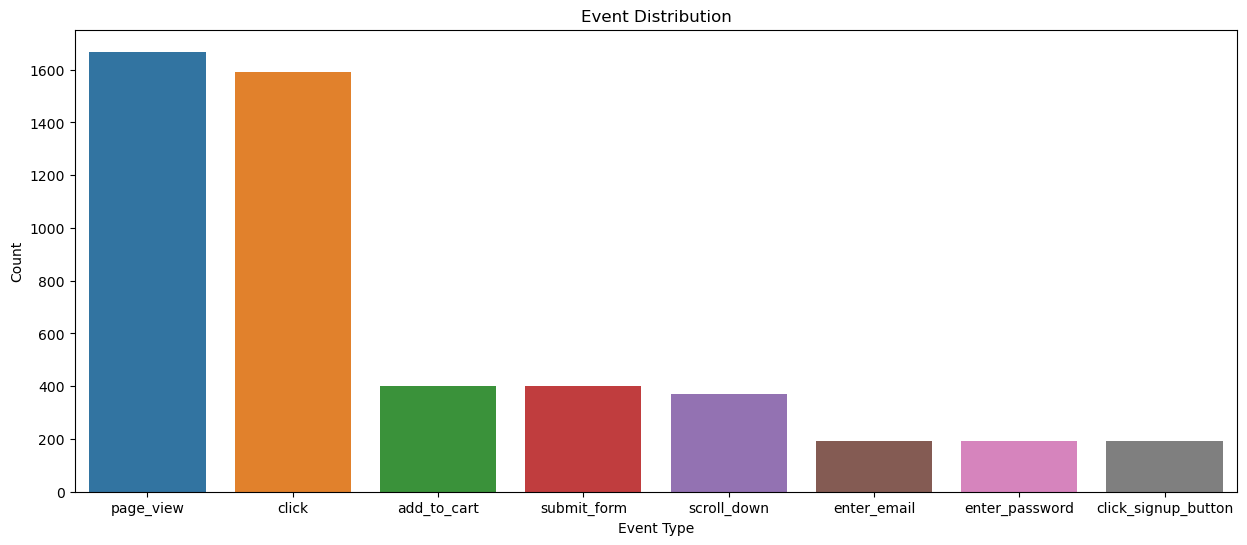

In [42]:
#Event distribution

plt.figure(figsize=(15, 6))
sns.countplot(x='event', data=data)
plt.title('Event Distribution')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

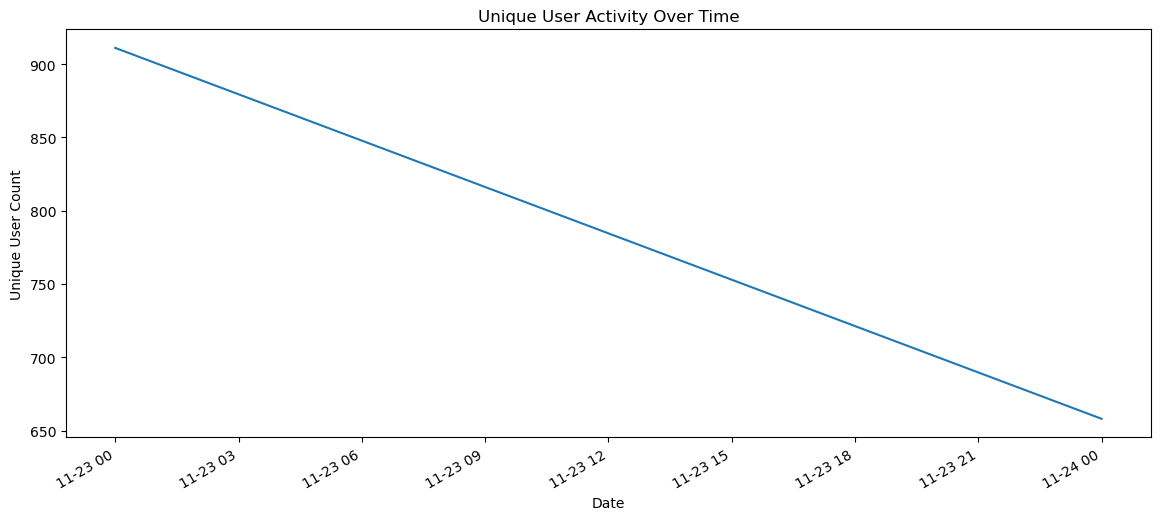

In [47]:
# User activity over time

data['timestamp'] = pd.to_datetime(data['timestamp'])
plt.figure(figsize=(14, 6))
data.set_index('timestamp')['user_id'].resample('D').nunique().plot()
plt.title('Unique User Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Unique User Count')
plt.show()

In [48]:
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
            user_id            timestamp      event  \
count   4999.000000                 4997       4997   
unique          NaN                   26          8   
top             NaN  2023-11-23 10:01:00  page_view   
freq            NaN                  221       1668   
mean     645.103421                  NaN        NaN   
std      372.216743                  NaN        NaN   
min        1.000000                  NaN        NaN   
25%      323.000000                  NaN        NaN   
50%      645.000000                  NaN        NaN   
75%      967.000000                  NaN        NaN   
max     1290.000000                  NaN        NaN   

                                    page_url  
count                                   4994  
unique                                    12  
top     https://www.example.com/product/1234  
freq                                     800  
mean                                     NaN  
std                                 

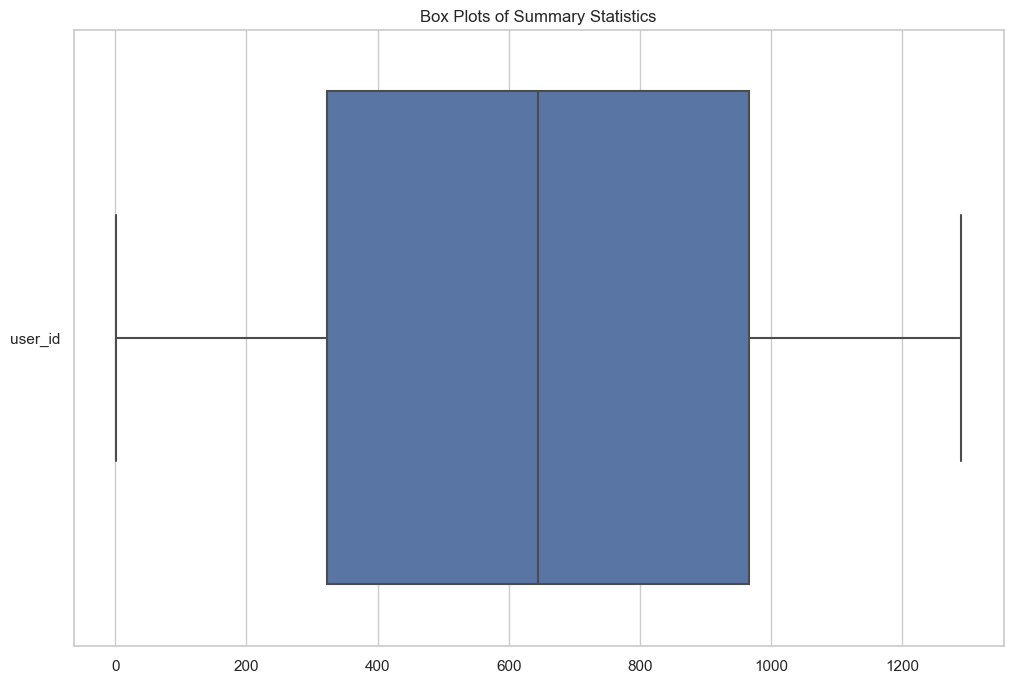

In [49]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=data, orient="h")
plt.title('Box Plots of Summary Statistics')
plt.show()

In [57]:
# Count the page views
page_views = data['page_url'].value_counts()

# Display the page views
print("Page Views:")
print(page_views)

Page Views:
page_url
https://www.example.com/product/1234     800
https://www.example.com/contact/form     798
https://www.example.com/signup           759
https://www.example.com/blog/article1    739
https://www.example.com/about            411
https://www.example.com/products         410
https://www.example.com/contact          400
https://www.example.com/blog             400
https://www.example.com/home             268
https://www.example.com/product/1236       4
https://www.example.com/product/1235       3
https://www.example.com/product/1237       2
Name: count, dtype: int64


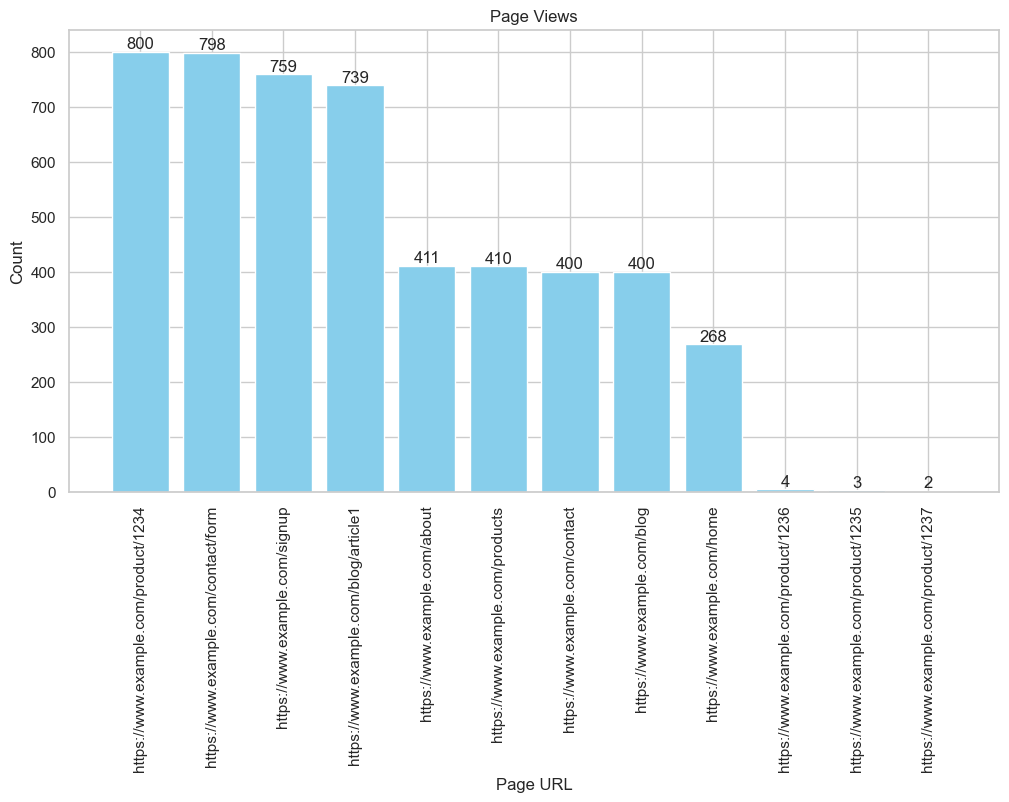

In [61]:
# Plot the page views
plt.figure(figsize=(12, 6))
bars = plt.bar(page_views.index, page_views.values, color='skyblue')

# Add data labels
for bar, value in zip(bars, page_views.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1,
             str(value), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.title('Page Views')
plt.xlabel('Page URL')
plt.ylabel('Count')
plt.show()

In [64]:
# Count the events
event_count = data['event'].value_counts()

# Display the events
print("Events:")
print(event_count)

Events:
event
page_view              1668
click                  1590
submit_form             400
add_to_cart             399
scroll_down             370
enter_email             190
enter_password          190
click_signup_button     190
Name: count, dtype: int64


In [66]:
# Count the total number of users
total_users = data['user_id'].nunique()

# Count the number of users who performed a click event
click_users = data[data['event'] == 'click']['user_id'].nunique()

# Calculate conversion rate
conversion_rate = (click_users / total_users) * 100

print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 88.06%


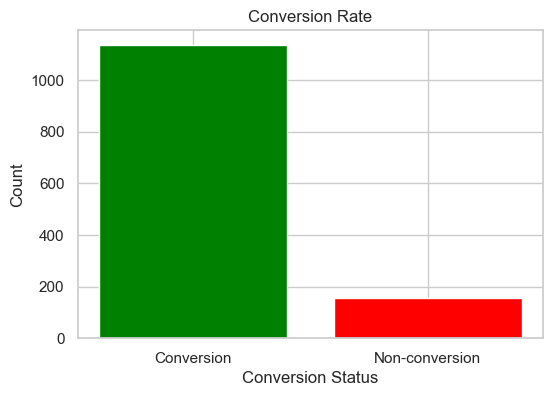

In [67]:
# Visualize conversion rate
plt.figure(figsize=(6, 4))
plt.bar(['Conversion', 'Non-conversion'], [click_users, total_users - click_users], color=['green', 'red'])
plt.title('Conversion Rate')
plt.xlabel('Conversion Status')
plt.ylabel('Count')
plt.show()

In [68]:
# Convert 'timestamp' to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Sort the DataFrame by 'user_id' and 'timestamp'
data.sort_values(['user_id', 'timestamp'], inplace=True)

In [69]:
# Calculate the time difference between consecutive events for each user
data['session_duration'] = data.groupby('user_id')['timestamp'].diff()

In [72]:
# Calculate the average session duration
average_session_duration = data['session_duration'].mean()

print(f"Average Session Duration: {average_session_duration}")

Average Session Duration: 0 days 01:48:22.724575128


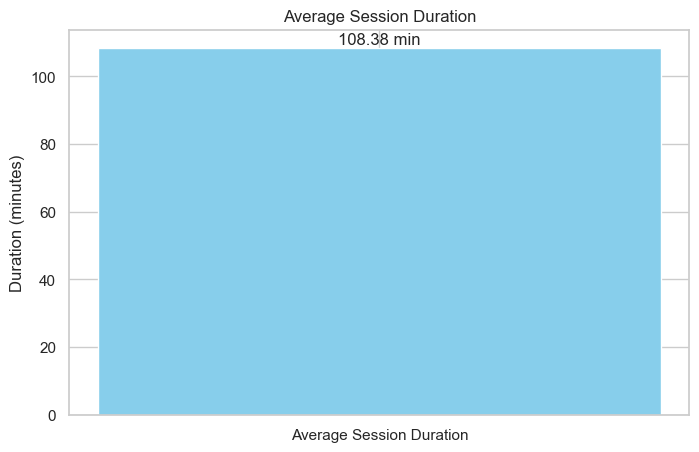

In [73]:
# Visualize average session duration with data label
plt.figure(figsize=(8, 5))
plt.bar(['Average Session Duration'], [average_session_duration.total_seconds() / 60], color='skyblue')
plt.title('Average Session Duration')
plt.ylabel('Duration (minutes)')

# Add data label
plt.text(0, average_session_duration.total_seconds() / 60 + 0.1, f"{average_session_duration.total_seconds() / 60:.2f} min", ha='center', va='bottom')

plt.show()

In [76]:
# Calculate the average session duration for every unique user
average_session_durations = data.groupby('user_id')['session_duration'].mean()

In [83]:
# Select the top 5 users with the highest average session durations
top_10_users = average_session_durations.nlargest(5)

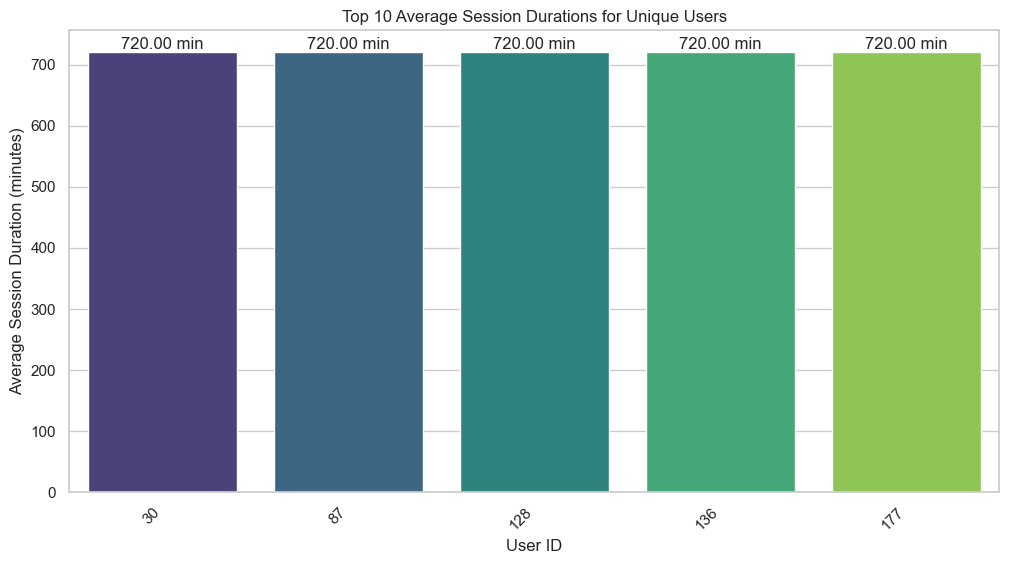

In [84]:
# Visualize top 5 average session durations with data labels
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_users.index, y=top_10_users.dt.total_seconds() / 60, palette='viridis')
plt.title('Top 10 Average Session Durations for Unique Users')
plt.xlabel('User ID')
plt.ylabel('Average Session Duration (minutes)')

# Add data labels
for i, value in enumerate(top_10_users.dt.total_seconds() / 60):
    plt.text(i, value + 0.1, f"{value:.2f} min", ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()

In [85]:
# Sort the DataFrame by 'user_id' and 'timestamp'
data.sort_values(['user_id', 'timestamp'], inplace=True)

In [86]:
# Count the number of interactions per user
interaction_count = data.groupby('user_id')['timestamp'].count()

In [87]:
# Count the number of users with a single interaction (bounce)
bounce_users = (interaction_count == 1).sum()

In [88]:
# Calculate bounce rate
total_users = data['user_id'].nunique()
bounce_rate = (bounce_users / total_users) * 100

print(f"Bounce Rate: {bounce_rate:.2f}%")

Bounce Rate: 0.08%


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


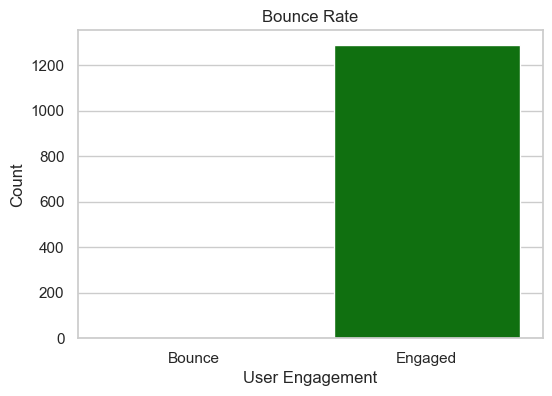

In [89]:
# Visualize bounce rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Bounce', 'Engaged'], y=[bounce_users, total_users - bounce_users], palette=['red', 'green'])
plt.title('Bounce Rate')
plt.xlabel('User Engagement')
plt.ylabel('Count')
plt.show()

The bounce rate is calculated as the percentage of users with a single interaction.
A bar plot is created to visualize the bounce rate, where one bar represents users who bounced (single interaction) and the other represents users who engaged further.

Click-Through Rate (CTR): 123.18%


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


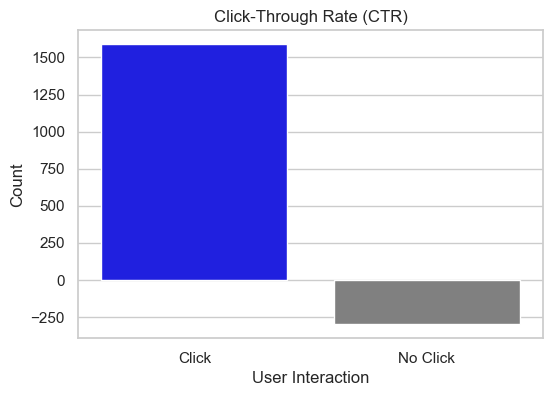

In [97]:
# Count the number of unique users
total_users = data['user_id'].nunique()

# Calculate click-through rate (CTR)
ctr = (click_count.sum() / total_users) * 100

print(f"Click-Through Rate (CTR): {ctr:.2f}%")

# Visualize click-through rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Click', 'No Click'], y=[click_count.sum(), total_users - click_count.sum()], palette=['blue', 'grey'])
plt.title('Click-Through Rate (CTR)')
plt.xlabel('User Interaction')
plt.ylabel('Count')
plt.show()

Shopping Cart Abandonment Rate: 100.00%


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Count')

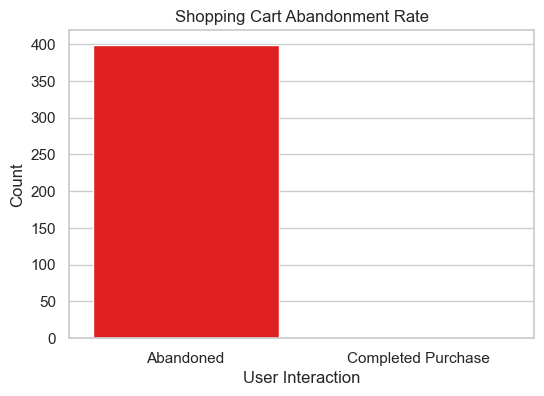

In [101]:
# Filter events related to adding items to the cart
add_to_cart_events = data[data['event'] == 'add_to_cart']

# Count the number of unique users who added items to the cart
users_added_to_cart = add_to_cart_events['user_id'].nunique()

# Count the number of unique users who completed the purchase
purchase_events = data[data['event'] == 'purchase']
users_completed_purchase = purchase_events['user_id'].nunique()

# Calculate shopping cart abandonment rate
abandonment_rate = ((users_added_to_cart - users_completed_purchase) / users_added_to_cart) * 100

print(f"Shopping Cart Abandonment Rate: {abandonment_rate:.2f}%")

# Visualize shopping cart abandonment rate
plt.figure(figsize=(6, 4))
sns.barplot(x=['Abandoned', 'Completed Purchase'], y=[users_added_to_cart - users_completed_purchase, users_completed_purchase], palette=['red', 'green'])
plt.title('Shopping Cart Abandonment Rate')
plt.xlabel('User Interaction')
plt.ylabel('Count')


The shopping cart abandonment rate is calculated as the percentage of users who added items to the cart but did not complete the purchase.
A bar plot is created to visualize the abandonment rate, where one bar represents users who abandoned the cart, and the other represents users who completed the purchase.